# Project Background

FreshGoGo is the first ever Chinese online grocery and authentic Asian food shopping and delivery service in North America supported by advanced technical platform. FreshGoGo provides customers with fresh and high-quality of Fresh Vegetables, Poultry & Meat, Fish & Seafood, Pantry, Dry Goods, Frozen Items, Refrigerated Items, Snacks, Drinks, as well as gourmet Asian food from local famous stores and restaurants at competitive prices. FreshGoGo customers can not only choose grocery items and process an order through multiple devices (smart phone, tablet and PC ), but also track the order/delivery status in real time from the point of order creation to the delivery, such as exact time when the order is loaded to the truck and when the order arrives. FreshGoGo offers nearby pickup locations and home delivery service. FreshGoGo makes grocery and food shopping & delivery fast and easy. In this project, I used the dataset for predictive data analytics purpose and developing customized reports and analysis to provide business insights that aid in driving growth, expansion and finalizing critical business decisions and reduce the food wastage.

## Data Description

After communicating with the operation team, I am provided with historical two months sales data for FreshGoGo stores located in different regions. The dataset is one of the historical sales of supermarket company which has recorded in 3 different branches for 2 months data. Predicitve and sale data analytics methods are not easy to apply with this dataset.Before I start the predictions,I conducted several exploratory data analysis.

Each documents contains number of customer ID and products infomations, and I am tasked with predicting the department-wide sales and need to solve the following problem: use existing data, divide different customer types, brake can understand that the customer is a high-quality supermarket customer, and provide it to the marketing team opinion.

Best Product Analysis
Sales time point analysis
Customer order volume analysis
In addition, Fresh GoGo runs several promotional markdown events and the different delivery type. Part of the challenge presented by this project is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data.Fresh Go Go Officail website



# Python Model and Data Import

# Datasets

The main python libraries used are：Pandas、Numpy、Matplotlib、Seaborn

Order+data+20200629-20200712.csv
Order+data+20200713-20200726.csv
This file contains anonymized information about the 45 stores, indicating the type and size of store.

xiaoshouliushui20200629-0712.xlsx
xiaoshouliushui20200713-0726.xlsx
This is the historical training data, which covers to 2020-06-29 to 2020-07-26. Within this file you will find the following fields:

In [2]:
import numpy as np                               # 向量和矩阵运算
import pandas as pd                              # 表格与数据处理
import matplotlib.pyplot as plt                  # 绘图
import seaborn as sns                            # 更多绘图功能
sns.set()

from dateutil.relativedelta import relativedelta # 日期数据处理
from scipy.optimize import minimize              # 优化函数

import statsmodels.formula.api as smf            # 数理统计
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import scipy.stats as scs

from itertools import product                    # 一些有用的函数
from tqdm import tqdm_notebook

# 1.2 Data Import and Read Order Information


Data import and read order CSV file information

In [6]:
#Sales 20200629-0712 as file 1
#Sales 20200713-0726 as file 2
file1=open(r"/Users/asus/Desktop/FreshGoGo/Order data 20200629-20200712.csv",encoding='utf-8')
file2=open(r"/Users/asus/Desktop/FreshGoGo/Order data 20200713-20200726.csv",encoding='utf-8')
freshgogo1 = pd.read_csv(file1)
freshgogo2 = pd.read_csv(file2)

Data import and read order information (read the product content of June and July orders)

In [7]:
#Sales with product information 20200629-0712 as file 3
#Sales with product information 20200713-0726 as file 4
files3 = pd.read_excel('/Users/asus/Desktop/FreshGoGo/xiaoshouliushui20200629-0712.xlsx')
files4 = pd.read_excel('/Users/asus/Desktop/FreshGoGo/xiaoshouliushui20200713-0726.xlsx')
#freshgogo1 = pd.read_excel(file3)
#freshgogo2 = pd.read_excel(file4)
files3.head(2)

,下单日期,订单号,送货日期,用户ID,供应商,SKU ID,商品名称（中文）,商品名称（英文）,税类,订购数量,商品单价,税金,总价
0,2020-06-29,1594699128,2020-07-16,55586018823,自营冻品分拣,12095,加拿大龙岗走地鸡(冷冻)(拼团)(*),NaN,Other Categories,5,23.99,0.0,119.95
1,2020-06-29,1598776640,2020-07-02,58991718899,自营批发蔬菜,11001,芫茜(香菜),NaN,Grocery,1,1.29,0.0,1.29


In [8]:
freshgogo1.head(2)

,Order Number,Order Time,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
0,1594699128,6/29/2020 0:00,55586018823,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0
1,1598776640,6/29/2020 0:03,58991718899,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0


In [9]:
freshgogo2.head(2)

,Order Number,Order Time,用户ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
0,1601116468,7/13/2020 0:00,58351892017,7/22/2020,NaN,已送达,118.18,信用卡支付,NaN,NaN,...,R-商品变质,ios,2.3.1,1.5,NaN,5,0.0,自提,DC,0
1,1602472924,7/13/2020 0:01,55085937222,7/18/2020,NaN,已送达,298.84,余额支付,NaN,NaN,...,NaN,ios,2.3.1,1.5,NaN,5,0.0,自提,OT,0


# 2.1 Combine Two-Month Sales Data and Order Content

Use the Concat function to merge the two-month order information

In [10]:
frames = [freshgogo1, freshgogo2]
Result = pd.concat(frames)

In [11]:
Result.head(2)

,Order Number,Order Time,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,...,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费,用户ID
0,1594699128,6/29/2020 0:00,5.558602e+10,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,...,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0,NaN
1,1598776640,6/29/2020 0:03,5.899172e+10,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,...,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0,NaN


In [12]:
Result.to_pickle('/Users/asus/Desktop/FreshGoGo/Order data 20200629-20200726.csv')

In [13]:
Result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24050 entries, 0 to 11955
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      24050 non-null  int64  
 1   Order Time        24050 non-null  object 
 2   Cust ID           12094 non-null  float64
 3   Delivery Date     24050 non-null  object 
 4   订单投诉              1035 non-null   object 
 5   Status            24050 non-null  object 
 6   Total Price       24050 non-null  float64
 7   Payment           24050 non-null  object 
 8   Voucher Discount  705 non-null    float64
 9   Voucher           705 non-null    object 
 10  Coupon Discount   54 non-null     float64
 11  Coupon            54 non-null     object 
 12  Tax Price         24050 non-null  float64
 13  Final Price       24050 non-null  float64
 14  Refund            12761 non-null  float64
 15  Customer Service  1514 non-null   object 
 16  OS of App         24050 non-null  object

In [14]:
Result.isnull().sum(axis=0)

Order Number            0
Order Time              0
Cust ID             11956
Delivery Date           0
订单投诉                23015
Status                  0
Total Price             0
Payment                 0
Voucher Discount    23345
Voucher             23345
Coupon Discount     23996
Coupon              23996
Tax Price               0
Final Price             0
Refund              11289
Customer Service    22536
OS of App               0
Unnamed: 17          6058
冷链包装费                2914
支付宝手续费              22511
会员券                     0
配送费                     0
到家/自提                   0
班次                      0
服务费                     0
用户ID                12094
dtype: int64

Rename field data

In [15]:
Result.rename(columns={"订单投诉":"complaint","会员券":"membership","配送费":"delivery_fee","到家/自提":"Delivery/Pick_up"},inplace=True)

# 2.2 Combine Two-Month Product Sales Data Orders


In [16]:
frames2 = [files3, files4]
Product = pd.concat(frames2)
Product.head(2)

,下单日期,订单号,送货日期,用户ID,供应商,SKU ID,商品名称（中文）,商品名称（英文）,税类,订购数量,商品单价,税金,总价
0,2020-06-29,1594699128,2020-07-16,55586018823,自营冻品分拣,12095,加拿大龙岗走地鸡(冷冻)(拼团)(*),NaN,Other Categories,5,23.99,0.0,119.95
1,2020-06-29,1598776640,2020-07-02,58991718899,自营批发蔬菜,11001,芫茜(香菜),NaN,Grocery,1,1.29,0.0,1.29


# 2.3 Combine Order Information With Product Sales Data Orders
Group By Two Dataframe Table via Order ID. The First Dataframe is " Result " dataframe and "Product" is about product infomation.

In [17]:
#If Join is based on the Number ID of the left form, there are only 436661 data in the intersection of the two, so choose how="left" to generate 448852 data
df = pd.merge(Result,Product,how="left") 
df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448852 entries, 0 to 448851
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Number      448852 non-null  int64         
 1   Order Time        448852 non-null  object        
 2   Cust ID           12094 non-null   float64       
 3   Delivery Date     448852 non-null  object        
 4   complaint         17125 non-null   object        
 5   Status            448852 non-null  object        
 6   Total Price       448852 non-null  float64       
 7   Payment           448852 non-null  object        
 8   Voucher Discount  9420 non-null    float64       
 9   Voucher           9420 non-null    object        
 10  Coupon Discount   843 non-null     float64       
 11  Coupon            843 non-null     object        
 12  Tax Price         448852 non-null  float64       
 13  Final Price       448852 non-null  float64       
 14  Refu

Data Cleaning Reference Needs to be Corrected After Discussion With the Team

In [18]:
#If you want to fill with numbers such as mean / median, you can use fillna(), followed by a specific formula to bring it in.
# Calculate the mean of the delivery_fee column: delivery_fee
delivery_fee_mean = df.delivery_fee.mean()
# Replace all the missing values in the Ozone column with the mean
df['delivery_fee'] = df.delivery_fee.fillna(delivery_fee_mean)
# Print the info of airquality
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 448852 entries, 0 to 448851
Data columns (total 38 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Order Number      448852 non-null  int64         
 1   Order Time        448852 non-null  object        
 2   Cust ID           12094 non-null   float64       
 3   Delivery Date     448852 non-null  object        
 4   complaint         17125 non-null   object        
 5   Status            448852 non-null  object        
 6   Total Price       448852 non-null  float64       
 7   Payment           448852 non-null  object        
 8   Voucher Discount  9420 non-null    float64       
 9   Voucher           9420 non-null    object        
 10  Coupon Discount   843 non-null     float64       
 11  Coupon            843 non-null     object        
 12  Tax Price         448852 non-null  float64       
 13  Final Price       448852 non-null  float64       
 14  Refu

# 3.1 Finding Trends in Fresh GoGo Best Sellers

I did some analysis on the Fresh GoGo Best Seller list from 2020 June through 2020 July to see if I could find any significant trends. Besides, I would like to find out what is the best suppliers from 2020 June through 2020 July.

# Choosing a Category/Genre

As shown in the graph below, Fresh Vegetables, Poultry & Meat, Fish & Seafood consistently comprise a higher percentage of the Best Seller list than any other category. Note that this does not mean that a product in these genres necessarily has a greater probability of being a bestseller, but it does suggest that these categories sell better than the others, and thus gategory in these genres have greater opportunity to become bestsellers.

Poultry & Meat is quite broad, but includes any product that can’t be classified into any of the other subcategories. This could mean Soy Products, Ginger,and other general product. It has also been referred to as mainstream fiction.FreshGoGo self-operated products dominates the supplers list.

In [19]:
df["Sales"]=df["总价"]
df["Product"]=df["商品名称（中文）"]
df["Supplier"]=df["供应商"]

In [20]:
Product_Sales = df.groupby(["Product",'Supplier']).agg({'Sales':'sum'})
Product_Sales["percent"] = Product_Sales["Sales"] /df["Sales"].sum()
Product_Sales.style.background_gradient()

In [21]:
Supplier_Sales=df.groupby(["Supplier"]).agg({"Sales":"sum"})
Supplier_Sales.style.background_gradient()

,Sales
Supplier,
46号美食店,6702.510000
FreshGoGo自营,1215272.119999
Miss Li,3048.530000
【下架】不老鸡不老鸭,174.920000
【下架】车轮饼,3317.160000
上海壹丰园,4970.910000
上海壹丰园-冷冻,12521.690000
上海壹丰园-冷菜,5109.580000
上海老正兴,1708.540000


In [22]:
# Top Ten Products With The Best Sales,Group By Product Name Count how many user ID
productId_count = df.groupby('商品名称（中文）').count()['用户ID'].sort_values(ascending=False)
print(productId_count.head(10))

商品名称（中文）
葱(低价)       7293
莴苣          4327
绍菜(低价)      3963
中国茄子(低价)    3819
番茄(低价)      3656
上海菜(低价)     3458
蒜头(低价)      3233
姜(低价)       3203
上海苗(低价)     3173
空心菜         3125
Name: 用户ID, dtype: int64


In [23]:
#Sale Top 10 product groupby product name and summary the sales 
productId_amount = df.groupby('商品名称（中文）').sum()['Sales'].sort_values(ascending=False)
print(productId_amount.head(10))
 
#Sale Top 10 suppliers groupby product name and summary the sales 
productId_Profit = df.groupby('Supplier').sum()['Sales'].sort_values(ascending=False)
print(productId_Profit.head(10))

商品名称（中文）
肥牛肉片                 29392.82
散装黑叶荔枝(限量)           25224.68
金钱腱(低价)              23468.21
(1.5磅)金沙骨(低价)        21891.98
绍菜(低价)               21029.46
招牌鱼饺(冷冻)(限量)【鱼饺子】    18495.72
空心菜                  18381.60
莴苣                   17264.13
天津黄瓜                 16967.11
无骨五花肉(低价)            16654.98
Name: Sales, dtype: float64
Supplier
FreshGoGo自营    1.215272e+06
自营批发蔬菜         7.704000e+05
自营冻品分拣         7.638637e+04
德昌肉品           6.209111e+04
老豫园-冷冻         6.142827e+04
凯诗琳            5.668518e+04
上海豫园           4.207482e+04
鱼饺子-冷冻         3.958217e+04
大班饼店           3.717856e+04
老北京            3.693188e+04
Name: Sales, dtype: float64


# 4.1 Point of Sale Analysis

In [44]:
dt= result['Order Time'].astype(str) #Convert to string format

NameError: name 'result' is not defined

In [45]:
from datetime import datetime

In [46]:
dt = dt.apply(lambda x:datetime.strptime(x,'%m/%d/%Y %H:%M'))

NameError: name 'dt' is not defined

In [47]:
result['month'] = dt.map(lambda x: x.month) #Get the month and add the column month
result['year'] = dt.map(lambda x: x.year)
result['day'] = dt.map(lambda x: x.day)
result['hour'] = dt.map(lambda x: x.hour)
result['minute'] = dt.map(lambda x: x.minute)
result.info()

NameError: name 'dt' is not defined

In [36]:
#Sort data by order date
fg_result=df.sort_values(by='Order Time',ascending=True,na_position='first')
#Put abnormal conversion data on it

In [37]:
#Select a subset of sales analysis data
sales_data=result[['Order Time','Total Price','Final Price','year','month','day','minute']]
sales_data.head()

NameError: name 'result' is not defined

Summary the total sales in the different years and month.

In [38]:
sales_year = sales_data.groupby(['year','month']).sum()
sales_year

NameError: name 'sales_data' is not defined

In [39]:
import seaborn as sns

In [40]:
sales = pd.read_csv('/Users/asus/Desktop/FreshGoGo/Order data 20200629-20200712.csv', index_col=['Order Time'], parse_dates=['Order Time'])
sales.head()

,Order Number,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,Coupon Discount,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
Order Time,,,,,,,,,,,,,,,,,,,,,
2020-06-29 00:00:00,1594699128,55586018823,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0
2020-06-29 00:03:00,1598776640,58991718899,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0
2020-06-29 00:04:00,1597710951,57851868718,7/4/2020,NaN,已送达,89.30,信用卡支付,5.0,新FAF【邀请有礼】【被邀请人】满$25减$5 活动至20201231结束,NaN,...,NaN,android,2.3.0,1.5,NaN,0,0.00,自提,OT,0
2020-06-29 00:04:00,1595995162,58431571996,7/2/2020,NaN,已送达,45.45,PayPal,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,2
2020-06-29 00:08:00,1602053507,59691743730,7/5/2020,FGG责任,已送达,247.80,信用卡支付,NaN,NaN,NaN,...,R-质量问题,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,0


In [41]:
sales_data=sales[['Total Price','Final Price']]
sales_data.head()

,Total Price,Final Price
Order Time,,
2020-06-29 00:00:00,119.95,121.45
2020-06-29 00:03:00,147.34,160.29
2020-06-29 00:04:00,89.30,86.53
2020-06-29 00:04:00,45.45,59.18
2020-06-29 00:08:00,247.80,262.20


In [42]:
sales_data.columns=['Total','Final']

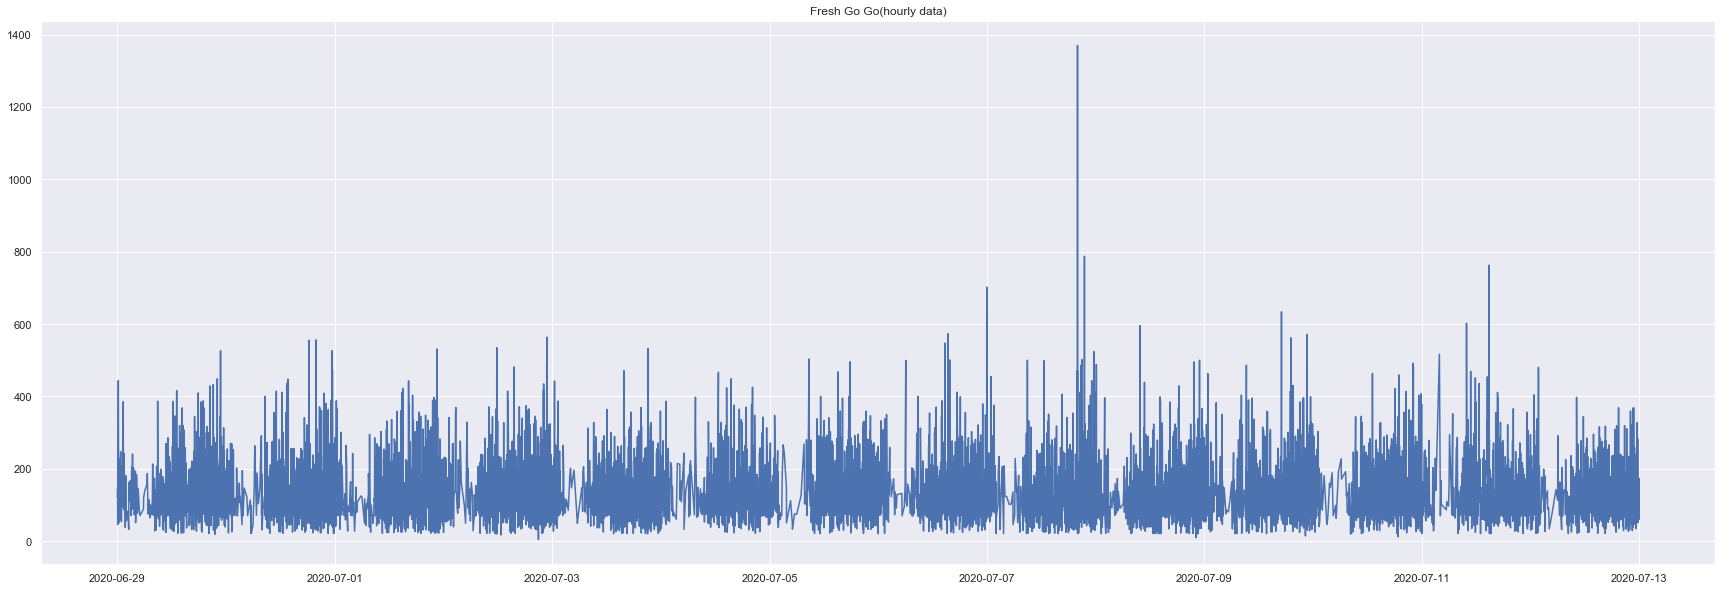

In [43]:
plt.figure(figsize=(30, 10))
plt.plot(sales_data.Total)
plt.title('Fresh Go Go(hourly data)')
plt.grid(True)
plt.show()

# 5.Customer order analysis

Customer unit price refers to the average purchase amount of goods per customer in a shopping mall (supermarket), and customer unit price is also the average transaction amount. To some extent, it reflects the many characteristics of the enterprise's consumer groups and whether the profitability of the enterprise's sales category is healthy. Total consumption times: All consumption by the same person in the same day is counted as one consumption.

Customer unit price = total consumption amount / total consumption times

In [48]:
price=df[['Order Time','Cust ID','Sales','订购数量']]

In [49]:
price.rename(columns={"Order Time":"order_time"},inplace=True)

/Applications/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [52]:
# Calculate total consumption
price_dr=price.drop_duplicates(subset=['order_time', 'Cust ID'])
# Total consumption: how many rows
total_num=price_dr.shape[0]
print('兩個月總消費次數=',total_num)
unit_price = price['Sales'].sum()/total_num
print('兩個月客單價=', unit_price,'\n')

兩個月總消費次數= 20320
兩個月客單價= 153.11689271653543 



In [53]:
grouped_Customer = price[['Cust ID','order_time','Sales']].sort_values(['order_time']).groupby('Cust ID') 
grouped_Customer.head()

,Cust ID,order_time,Sales
0,5.558602e+10,6/29/2020 0:00,NaN
1,5.899172e+10,6/29/2020 0:03,NaN
2,5.785187e+10,6/29/2020 0:04,NaN
3,5.843157e+10,6/29/2020 0:04,NaN
4,5.969174e+10,6/29/2020 0:08,NaN
...,...,...,...
8940,5.236078e+10,7/9/2020 9:55,NaN
8941,5.788069e+10,7/9/2020 9:56,NaN
8942,5.457743e+10,7/9/2020 9:57,NaN
8943,5.696464e+10,7/9/2020 9:58,NaN


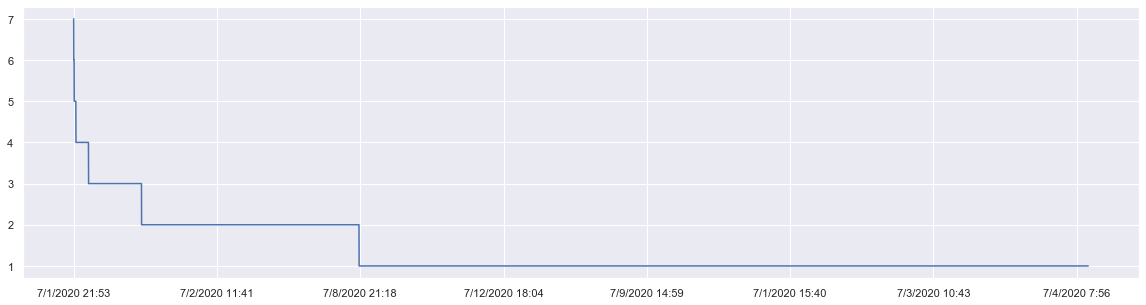

In [54]:
#看一下用戶的第一次購買日期分布
grouped_Customer.min().order_time.value_counts().plot(figsize=(20,5))

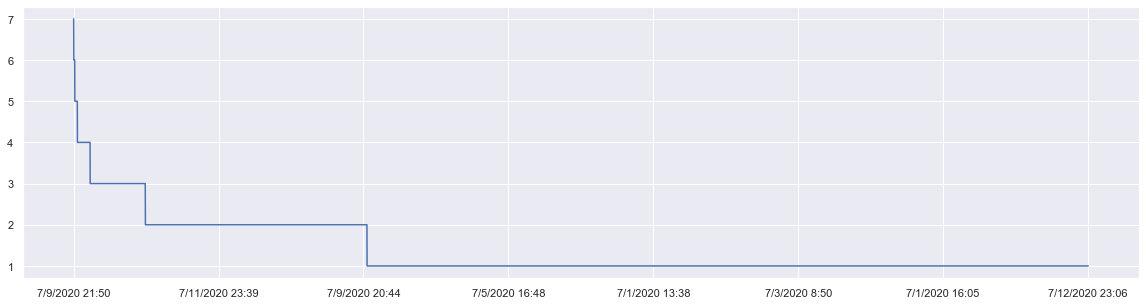

In [55]:
#再來看一下用戶的最後一次購買日期分布
grouped_Customer.max().order_time.value_counts().plot(figsize=(20,5))

再來看看只購買過一次的客戶數量 ：

In [56]:
# 統計每個客戶第一次和最後一次購買記錄
Customer_life = grouped_Customer.order_time.agg(['min','max'])

In [57]:
# 查看只有一次購買記錄的顧客數量，第一次和最後一次是同一條記錄，則說明購買只有一次
(Customer_life['min'] == Customer_life['max']).value_counts()

True     7777
False    1895
dtype: int64

從結果來看，只購買一次的用戶有7777個，大部分用戶都會購買多次，說明回頭率很低， 也驗證了上面關於該企業老客戶的維繫不夠的結論。

RFM的含義：
R（Recency）：客戶最近一次交易時間的間隔。R值越大，表示客戶交易發生的日期越久，反之則表示客戶交易發生的日期越近。
F（Frequency）：客戶在最近一段時間內交易的次數。F值越大，表示客戶交易越頻繁，反之則表示客戶交易不夠活躍。
M（Monetary）：客戶在最近一段時間內交易的金額。M值越大，表示客戶價值越高，反之則表示客戶價值越低。
RFM分析就是根據客戶活躍程度和交易金額的貢獻，進行客戶價值細分的一種方法。
首先構建RFM表：

 From the results, there are 7777 users who only purchased once, and most users will buy multiple times, indicating that the return rate is very low, and it also verifies the above conclusion about the insufficient maintenance of the company's old customers.
After predicting the trend data, adding periodic data is the final prediction result, but more importantly, what we want to get is not a specific value, but a reasonable interval. When the real data exceeds this interval, an alarm is triggered. The setting of the error range comes from the residual data just decomposed


# RFM Model analysis 

RFM的含義：

R（Recency）：客戶最近一次交易時間的間隔。R值越大，表示客戶交易發生的日期越久，反之則表示客戶交易發生的日期越近。

F（Frequency）：客戶在最近一段時間內交易的次數。F值越大，表示客戶交易越頻繁，反之則表示客戶交易不夠活躍。

M（Monetary）：客戶在最近一段時間內交易的金額。M值越大，表示客戶價值越高，反之則表示客戶價值越低。

RFM分析就是根據客戶活躍程度和交易金額的貢獻，進行客戶價值細分的一種方法。

首先構建RFM表：

原文網址：https://kknews.cc/code/258oaxz.html

首先構建RFM表：

In [60]:
#rfm = sales.pivot_table(index='Cust ID', values = ["订购数量","Sales","order_time"], aggfunc={"订购数量":"sum","Sales":"sum","order_time":"max"}) 

In [61]:
df.describe()

,Order Number,Cust ID,Total Price,Voucher Discount,Coupon Discount,Tax Price,Final Price,Refund,冷链包装费,支付宝手续费,...,服务费,用户ID,订单号,SKU ID,商品名称（英文）,订购数量,商品单价,税金,总价,Sales
count,4.488520e+05,1.209400e+04,448852.000000,9420.000000,843.0,448852.000000,448852.000000,260944.000000,406423.0,28050.0,...,448852.000000,4.367580e+05,4.366610e+05,4.366610e+05,0.0,436661.000000,436661.000000,436661.000000,436661.000000,436661.000000
mean,1.600155e+09,4.931379e+10,143.993779,4.627919,2.0,2.149215,151.824706,19.899484,1.5,1.5,...,0.151894,4.955792e+10,1.599722e+09,3.690802e+04,NaN,1.228946,6.026271,0.115352,7.125288,7.125288
std,2.918006e+06,1.701714e+10,83.318273,2.008498,0.0,2.837625,86.175121,40.943679,0.0,0.0,...,0.529827,1.689582e+10,2.957249e+06,8.888373e+04,NaN,0.719512,5.797254,0.327432,7.518413,7.518413
min,1.593420e+09,5.012500e+06,3.980000,1.000000,2.0,0.000000,4.080000,0.300000,1.5,1.5,...,0.000000,5.012500e+06,1.593503e+09,1.001400e+04,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.597643e+09,5.286076e+10,84.910000,4.000000,2.0,0.000000,90.540000,4.420000,1.5,1.5,...,0.000000,5.285713e+10,1.597229e+09,1.110500e+04,NaN,1.000000,2.790000,0.000000,2.990000,2.990000
50%,1.600169e+09,5.496466e+10,124.500000,5.000000,2.0,1.220000,132.260000,8.070000,1.5,1.5,...,0.000000,5.489180e+10,1.599662e+09,1.436300e+04,NaN,1.000000,4.290000,0.000000,4.990000,4.990000
75%,1.602681e+09,5.752344e+10,179.280000,5.000000,2.0,3.170000,188.840000,16.370000,1.5,1.5,...,0.000000,5.746311e+10,1.602225e+09,4.403900e+04,NaN,1.000000,7.090000,0.000000,8.580000,8.580000
max,1.605783e+09,5.999790e+10,1370.000000,15.000000,2.0,34.620000,1370.240000,575.340000,1.5,1.5,...,2.000000,5.250173e+11,1.605783e+09,4.416133e+06,NaN,98.000000,116.250000,13.900000,399.950000,399.950000


In [62]:
df.head()

,Order Number,Order Time,Cust ID,Delivery Date,complaint,Status,Total Price,Payment,Voucher Discount,Voucher,...,商品名称（中文）,商品名称（英文）,税类,订购数量,商品单价,税金,总价,Sales,Product,Supplier
0,1594699128,6/29/2020 0:00,5.558602e+10,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1598776640,6/29/2020 0:03,5.899172e+10,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1597710951,6/29/2020 0:04,5.785187e+10,7/4/2020,NaN,已送达,89.30,信用卡支付,5.0,新FAF【邀请有礼】【被邀请人】满$25减$5 活动至20201231结束,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1595995162,6/29/2020 0:04,5.843157e+10,7/2/2020,NaN,已送达,45.45,PayPal,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1602053507,6/29/2020 0:08,5.969174e+10,7/5/2020,FGG责任,已送达,247.80,信用卡支付,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
df = df.rename(columns={"订购数量": "Quantity", "Total Price": "TotalPrice","Order Number": "InvoiceDate"})

In [64]:
for col in df.columns: 
    print(col) 

InvoiceDate
Order Time
Cust ID
Delivery Date
complaint
Status
TotalPrice
Payment
Voucher Discount
Voucher
Coupon Discount
Coupon
Tax Price
Final Price
Refund
Customer Service
OS of App
Unnamed: 17
冷链包装费
支付宝手续费
membership
delivery_fee
Delivery/Pick_up
班次
服务费
用户ID
下单日期
订单号
送货日期
供应商
SKU ID
商品名称（中文）
商品名称（英文）
税类
Quantity
商品单价
税金
总价
Sales
Product
Supplier


In [65]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],format = '%Y-%m-%d %H:%M:%S')

In [66]:
df_cus = df.groupby('用户ID').agg({'Quantity':'count', 'TotalPrice':'sum'}).query('Quantity > 0').query('TotalPrice > 0')
df_cus.describe()

,Quantity,TotalPrice
count,9415.000000,9415.000000
mean,46.379288,6698.982447
std,61.061416,11588.977495
min,1.000000,7.960000
25%,17.000000,1568.570000
50%,30.000000,3549.280000
75%,54.000000,7731.240000
max,2737.000000,383696.120000


用户平均消费46次，最多的用户共消费了248次，属于狂热用户。
用户平均消费1924£，标准差8265，波动较大。
结合两个特征的分位数和最大值看，平均值都与第3四分位数相似，可以肯定存在小部分的高额消费用户。

In [59]:
rfm[['R','F','M']].apply(lambda x:x-x.mean())

NameError: name 'rfm' is not defined

Text(0.5, 1.0, 'Comparison of consumption times and consumption amount')

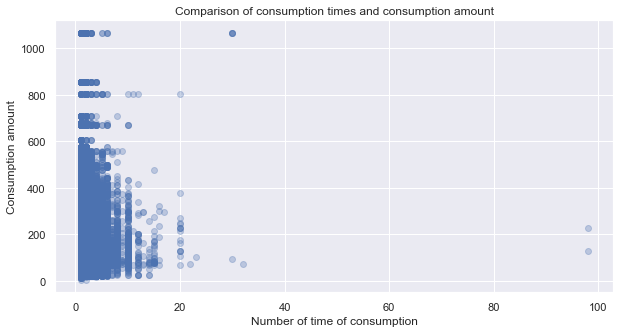

In [67]:
plt.figure(figsize=(10,5))
plt.scatter(x=df['Quantity'], y=df['TotalPrice'], alpha = .3)
plt.xlabel('Number of time of consumption')
plt.ylabel('Consumption amount')
plt.title('Comparison of consumption times and consumption amount')

Text(0.5, 1.0, 'Distribution of user consumption amount')

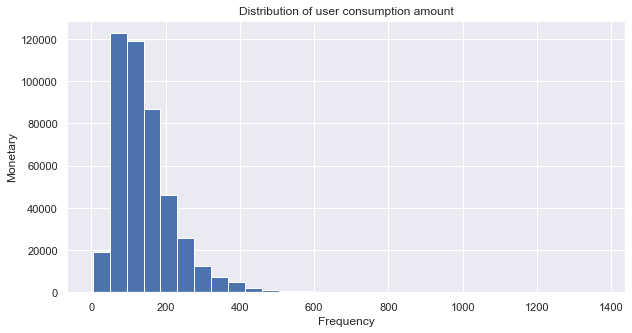

In [68]:
plt.figure(figsize=(10,5))
plt.hist(df.query('TotalPrice < 10195').TotalPrice, bins = 30)
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Distribution of user consumption amount')

Use Chebyshev's theorem to filter out abnormal values ​​and calculate the distribution of 95% of the data. The graph shows a typical long-tailed distribution, and most users' consumption is concentrated below 1,500 pounds.

In [69]:
grouped_cus_order = df.groupby('用户ID')
order_diff = grouped_cus_order.apply(lambda x:x.InvoiceDate - x.InvoiceDate.shift())
order_diff.head(10)

用户ID             
5012500.0  331095                        NaT
           348929   -1 days +23:59:59.997072
           349726            00:00:00.003814
           395290   -1 days +23:59:59.994025
           395337            00:00:00.001977
5372602.0  73861                         NaT
           73862                    00:00:00
           73863                    00:00:00
           73864                    00:00:00
           73865                    00:00:00
Name: InvoiceDate, dtype: timedelta64[ns]

In [70]:
order_diff.describe()

count                      427277
mean       0 days 00:00:00.000002
std        0 days 00:00:00.000318
min      -1 days +23:59:59.990401
25%               0 days 00:00:00
50%               0 days 00:00:00
75%               0 days 00:00:00
max        0 days 00:00:00.010500
Name: InvoiceDate, dtype: object

In [71]:
rfm = df.pivot_table(index = '用户ID',
                  values = ['Quantity','TotalPrice','InvoiceDate'],
              aggfunc = {'Quantity':'sum',
                        'TotalPrice':'sum',
                        'InvoiceDate':'max'})

rfm['InvoiceDate'] = -(rfm.InvoiceDate - rfm.InvoiceDate.max()) / np.timedelta64(1, 'D')
rfm.rename(columns={'InvoiceDate':'R', 'Quantity':'F', 'TotalPrice':'M'}, inplace = True)

rfm.head()

,R,F,M
用户ID,,,
5012500.0,2.513531e-08,0.0,340.28
5372602.0,5.184328e-08,29.0,973.77
52265138.0,4.694051e-08,6.0,129.90
52634775.0,3.224039e-09,52.0,5085.00
52671813.0,1.193237e-07,24.0,1328.10


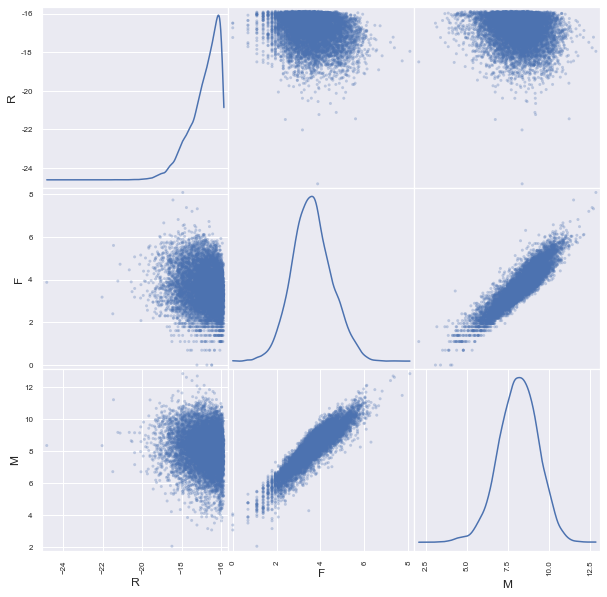

In [72]:

# delete nap
rfm = rfm[rfm != 0].dropna()
log_rfm = np.log(rfm)
pd.plotting.scatter_matrix(log_rfm, alpha = 0.3, figsize = (10,10), diagonal = 'kde');

In [73]:
log_rfm.describe()

,R,F,M
count,9414.000000,9414.000000,9414.000000
mean,-16.840306,3.613247,8.137160
std,0.767652,0.901436,1.194721
min,-24.831597,0.000000,2.074429
25%,-17.261500,2.995732,7.357783
50%,-16.653312,3.583519,8.174489
75%,-16.232911,4.189655,8.952615
max,-15.871867,8.077137,12.857606


In [59]:
def rfm_func(x): 
    level =x.apply(lambda x:'1'if x>0 else '0') 
    level =level.R +level.F +level.M 
    d = { "111":"重要價值客戶", "011":"重要保持客戶", "101":"重要挽留客戶", "001":"重要發展客戶", "110":"一般價值客戶", "010":"一般保持客戶", "100":"一般挽留客戶", "000":"一般發展客戶" } 
    result = d[level] 
    return result

In [34]:
result.to_pickle('/Users/asus/Desktop/FreshGoGo/Order data 20200629-20200726.xlsx')

In [19]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24050 entries, 0 to 11955
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      24050 non-null  int64  
 1   Order Time        24050 non-null  object 
 2   Cust ID           12094 non-null  float64
 3   Delivery Date     24050 non-null  object 
 4   订单投诉              1035 non-null   object 
 5   Status            24050 non-null  object 
 6   Total Price       24050 non-null  float64
 7   Payment           24050 non-null  object 
 8   Voucher Discount  705 non-null    float64
 9   Voucher           705 non-null    object 
 10  Coupon Discount   54 non-null     float64
 11  Coupon            54 non-null     object 
 12  Tax Price         24050 non-null  float64
 13  Final Price       24050 non-null  float64
 14  Refund            12761 non-null  float64
 15  Customer Service  1514 non-null   object 
 16  OS of App         24050 non-null  object

In [20]:
result.drop(["Unnamed: 17","Refund","支付宝手续费"],axis=1, inplace=True)

In [21]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 24050 entries, 0 to 11955
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Order Number      24050 non-null  int64  
 1   Order Time        24050 non-null  object 
 2   Cust ID           12094 non-null  float64
 3   Delivery Date     24050 non-null  object 
 4   订单投诉              1035 non-null   object 
 5   Status            24050 non-null  object 
 6   Total Price       24050 non-null  float64
 7   Payment           24050 non-null  object 
 8   Voucher Discount  705 non-null    float64
 9   Voucher           705 non-null    object 
 10  Coupon Discount   54 non-null     float64
 11  Coupon            54 non-null     object 
 12  Tax Price         24050 non-null  float64
 13  Final Price       24050 non-null  float64
 14  Customer Service  1514 non-null   object 
 15  OS of App         24050 non-null  object 
 16  冷链包装费             21136 non-null  float6

In [16]:
dt

0         6/29/2020 0:00
1         6/29/2020 0:03
2         6/29/2020 0:04
3         6/29/2020 0:04
4         6/29/2020 0:08
              ...       
11951    7/26/2020 23:55
11952    7/26/2020 23:57
11953    7/26/2020 23:58
11954    7/26/2020 23:59
11955    7/26/2020 23:59
Name: Order Time, Length: 24050, dtype: object

In [24]:
sales_year = sales_data.groupby(['year','month']).sum()
sales_year

Total Price  Final Price     day  minute
year month                                          
2020 6        227987.04    242263.65   51723   51958
     7       2818611.16   2994082.08  297515  668691

In [25]:
import seaborn as sns

In [26]:
sales = pd.read_csv('/Users/asus/Desktop/FreshGoGo/Order data 20200629-20200712.csv', index_col=['Order Time'], parse_dates=['Order Time'])
sales.head()

,Order Number,Cust ID,Delivery Date,订单投诉,Status,Total Price,Payment,Voucher Discount,Voucher,Coupon Discount,...,Customer Service,OS of App,Unnamed: 17,冷链包装费,支付宝手续费,会员券,配送费,到家/自提,班次,服务费
Order Time,,,,,,,,,,,,,,,,,,,,,
2020-06-29 00:00:00,1594699128,55586018823,7/16/2020,NaN,已送达,119.95,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,0.00,自提,NY,0
2020-06-29 00:03:00,1598776640,58991718899,7/2/2020,NaN,已送达,147.34,信用卡支付,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,6.99,到家,NY,0
2020-06-29 00:04:00,1597710951,57851868718,7/4/2020,NaN,已送达,89.30,信用卡支付,5.0,新FAF【邀请有礼】【被邀请人】满$25减$5 活动至20201231结束,NaN,...,NaN,android,2.3.0,1.5,NaN,0,0.00,自提,OT,0
2020-06-29 00:04:00,1595995162,58431571996,7/2/2020,NaN,已送达,45.45,PayPal,NaN,NaN,NaN,...,NaN,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,2
2020-06-29 00:08:00,1602053507,59691743730,7/5/2020,FGG责任,已送达,247.80,信用卡支付,NaN,NaN,NaN,...,R-质量问题,ios,2.3.0,1.5,NaN,0,9.99,到家,NY,0


In [27]:
sales_data=sales[['Total Price','Final Price']]
sales_data.head()

,Total Price,Final Price
Order Time,,
2020-06-29 00:00:00,119.95,121.45
2020-06-29 00:03:00,147.34,160.29
2020-06-29 00:04:00,89.30,86.53
2020-06-29 00:04:00,45.45,59.18
2020-06-29 00:08:00,247.80,262.20


In [28]:
sales_data.columns=['Total','Final']

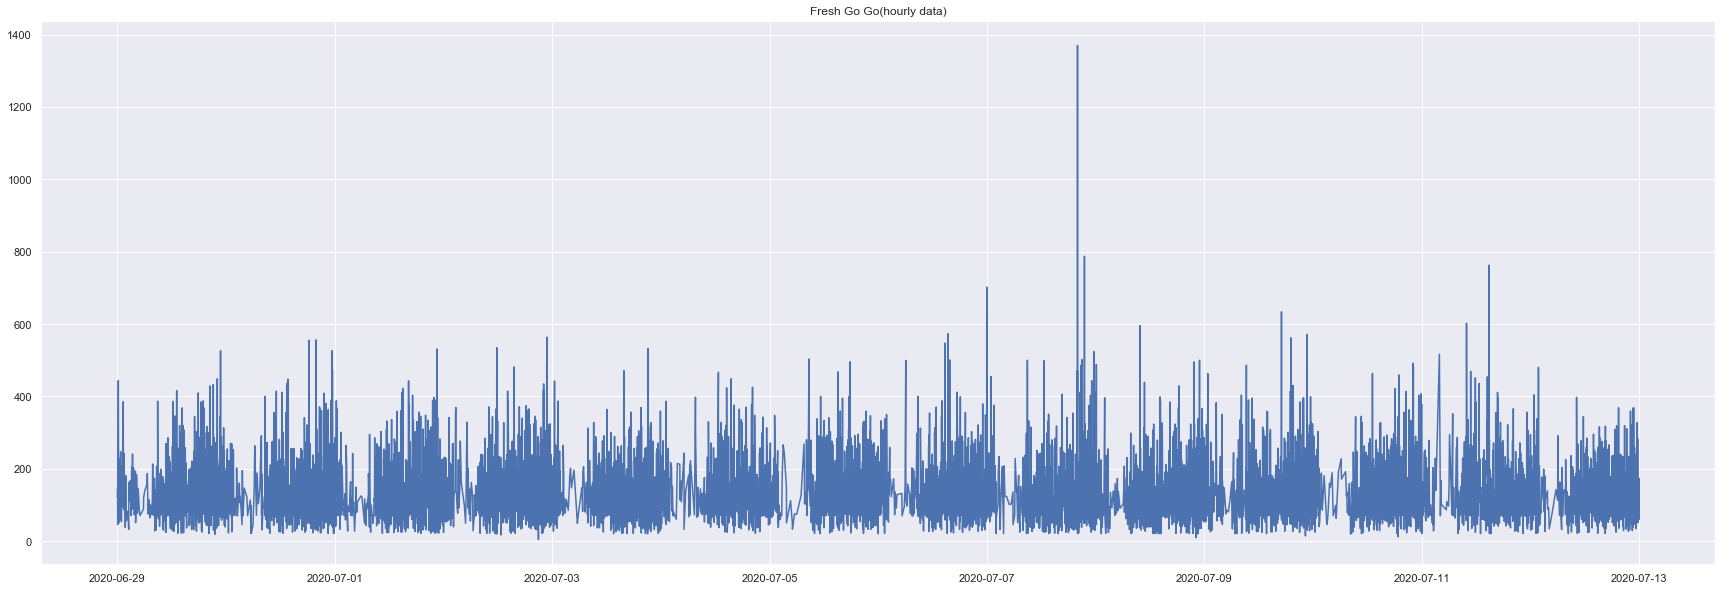

In [29]:
plt.figure(figsize=(30, 10))
plt.plot(sales_data.Total)
plt.title('Fresh Go Go(hourly data)')
plt.grid(True)
plt.show()